<a href="https://colab.research.google.com/github/Pilestin/MachineLearning/blob/main/1-MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as PD 

df = PD.read_csv("score.csv")

df.head()  # bir kısmını gösterir
df.shape   # boyut(25,2)
df.info()  # tablo bilgisi 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


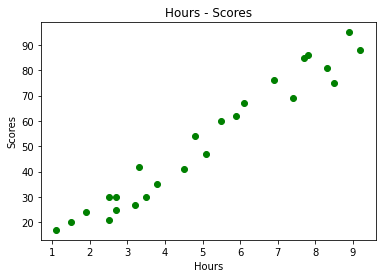

In [ ]:
import matplotlib.pyplot as PLT 
PLT.scatter(x = df["Hours"] , y=df["Scores"] , color="green")       
# tanım
PLT.xlabel("Hours")
PLT.ylabel("Scores")
PLT.title("Hours - Scores")
PLT.show()


In [ ]:
x = df["Hours"]
y = df["Scores"]



In [ ]:
import sklearn.model_selection 

x_train, x_test, y_train, y_test =  sklearn.model_selection.train_test_split(x,y,train_size=0.8) # %80 ini test için ayır.


In [ ]:
x_train


14    1.1
23    6.9
19    7.4
12    4.5
9     2.7
15    8.9
2     3.2
7     5.5
18    6.1
6     9.2
20    2.7
1     5.1
5     1.5
8     8.3
3     8.5
4     3.5
13    3.3
11    5.9
22    3.8
0     2.5
Name: Hours, dtype: float64

In [ ]:
x_test

In [ ]:
# x_test 5 adet veriden oluşur çünkü %80 - %20 ayırdık
y_train

In [ ]:
y_test

array([[25],
       [35],
       [42],
       [60],
       [54]])

In [ ]:
import numpy as NP 

x_train = NP.array(x_train)
x_test= NP.array(x_test)
y_train = NP.array(y_train)
y_test = NP.array(y_test)

# şimdi boyutlandırmayı yapmalıyız. Bir çeşit matris formatı diyebiliriz.
# (5,) olan boyutu (5,1) yapmak gibi.
# -1 demek sen tahmin et demek.
x_train = x_train.reshape(-1,1)
x_test= x_test.reshape(-1,1)
# Bu ikisinin boyutu (5, ) şeklinde olmalı.( tek noyutlu)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


In [ ]:
# 0-10 arasındaki sayılarla 3,4,5 boyutunda matris oluştur.
arr = NP.random.randint(0,10, (3,4,5))
arr 



array([[[8, 1, 6, 1, 8],
        [2, 3, 2, 9, 4],
        [7, 3, 1, 4, 6],
        [5, 0, 2, 9, 7]],

       [[5, 0, 1, 1, 2],
        [2, 3, 8, 8, 4],
        [2, 1, 5, 8, 9],
        [2, 1, 4, 7, 6]],

       [[6, 1, 8, 6, 8],
        [2, 1, 6, 1, 5],
        [6, 5, 8, 3, 5],
        [3, 8, 2, 8, 2]]])

In [ ]:
arr.ndim

In [ ]:
arr.shape

In [ ]:
arr2 = arr.reshape(-1 , 12) # 12 kolon -1 ise uygun satırı kendisi bulacak
arr2
# içerik 60 olacak şekilde ayarlar aslında satırı

In [ ]:
arr3 = arr.reshape(-1, 5)
arr3

#  Modelin Seçimi ve Eğitimi

In [ ]:
import sklearn.linear_model 
lin_model = sklearn.linear_model.LinearRegression()
lin_model.fit(x_train , y_train)
# Model eğitimi burada bitti

LinearRegression()

# Modelin Optimize Edilmesi


In [ ]:
import sklearn.metrics 
predictions = lin_model.predict(x_test)

x_test[0]


array([8.3])

8.3 saat çalışırsa 

In [ ]:
print(predictions)

[[83.67561642]
 [92.47829056]
 [39.6622457 ]
 [77.80716699]
 [56.28951909]]


83.67 alır sonucunu bulduk 

In [ ]:
x_test[-1] # sonuncu veri

array([5.5])

In [ ]:
for i in range(len(x_test)):
    print(f"{i}: Gerçek değer : {y_test[i]} - Tahmin : {predictions[i]} ")

0: Gerçek değer : [81] - Tahmin : [83.67561642] 
1: Gerçek değer : [88] - Tahmin : [92.47829056] 
2: Gerçek değer : [35] - Tahmin : [39.6622457] 
3: Gerçek değer : [85] - Tahmin : [77.80716699] 
4: Gerçek değer : [60] - Tahmin : [56.28951909] 


Hata farklarını bulmalıyız : 

In [ ]:
mae = sklearn.metrics.mean_absolute_error(y_test,predictions) 
print(mae)

4.543893321831649


In [ ]:
mse = sklearn.metrics.mean_squared_error(y_test,predictions) 
print(mse)

22.891011981644656


In [ ]:
r2 = sklearn.metrics.r2_score(y_test, predictions)
print(r2)

0.9426232906014521


tahmin yaptıralım ( sayısal çözümleme gibi)

In [ ]:
score_tahmini = lin_model.predict([[7.7]])
print(score_tahmini)

[[77.80716699]]


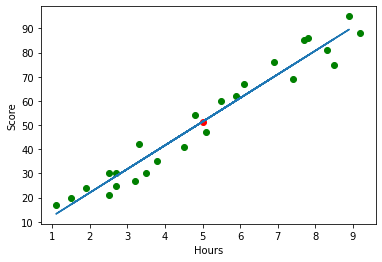

In [ ]:
x_predictions = lin_model.predict(x_train)
PLT.scatter(x=df["Hours"], y=df["Scores"],color="green")

PLT.scatter(x=5, y=lin_model.predict([[5]]) , color="red" ) # beş saat çalışan tahmini kaç alır
PLT.plot(x_train, x_predictions)
PLT.xlabel("Hours")
PLT.ylabel("Score")
PLT.show()